In [954]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm #google

# Data pre-processing
from sklearn.preprocessing import StandardScaler
# Data splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier


# evaluation metrics
from sklearn.metrics import accuracy_score

# decision tree
from sklearn import tree

# support vector machine
from sklearn import svm

In [955]:
!pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [956]:
df = pd.read_csv('formatted_dataset.csv',index_col=0)

In [957]:
# df.rename(columns={'Nacionality':'Nationality'}, inplace=True)

In [958]:
df_with_dummies=df.copy()

In [959]:
df_with_dummies.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [960]:
df_with_dummies=df_with_dummies[['Marital status', 
                                 'Course', 
                                 'Daytime/evening attendance', 
                                 "Mother's occupation",
                                 'Educational special needs', 
                                 'Debtor', 
                                 'Gender', 
                                 'Scholarship holder', 
                                 'Age at enrollment',
                                 'International',
                                 'Curricular units 2nd sem (approved)',
                                 'Target']]

create dummy variables for categorical columns

In [961]:
# from udacity example
# create dummy variables for categorical data in sample
def create_dummy(df, cat_cols, dummy_na):
    for column in cat_cols:
        try:
            df = pd.concat([df.drop(column, axis=1), pd.get_dummies(df[column], prefix=column, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [962]:
# TODO: maybe replace numbered values with corresponding string value

all_cols=['Marital status', 'Course',
       "Mother's qualification", 'Target']

In [963]:
# TODO: Maybe delete this part

dummy = create_dummy(df_with_dummies, all_cols, dummy_na=False)
dummy

,Daytime/evening attendance,Mother's occupation,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (evaluations),Marital status_Facto union,...,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Oral Hygiene,Course_Social Service,Course_Social Service (evening attendance),Course_Tourism,Course_Veterinary Nursing,Target_Enrolled,Target_Graduate
0,1,6,0,0,1,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,1,0,19,0,6,0,...,0,0,0,0,0,0,1,0,0,1
2,1,10,0,0,1,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,0,0,0,0,20,0,10,0,...,0,0,0,0,0,0,0,0,0,1
4,0,10,0,0,0,0,45,0,6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,0,0,1,0,19,0,8,0,...,0,0,0,0,0,0,0,0,0,1
4420,1,10,0,1,0,0,18,1,6,0,...,0,0,0,0,0,0,0,0,0,0
4421,1,10,0,0,0,1,30,0,9,0,...,0,0,1,0,0,0,0,0,0,0
4422,1,8,0,0,0,1,20,0,6,0,...,1,0,0,0,0,0,0,0,0,1


In [964]:
# TODO: this might be clutter, delete

c_matrix = dummy.corr()
c_matrix

,Daytime/evening attendance,Mother's occupation,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (evaluations),Marital status_Facto union,...,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Oral Hygiene,Course_Social Service,Course_Social Service (evening attendance),Course_Tourism,Course_Veterinary Nursing,Target_Enrolled,Target_Graduate
Daytime/evening attendance,1.000000,-0.037986,0.031017,0.006658,-0.012326,0.093912,-0.462280,0.027973,0.014610,-0.012285,...,0.107314,-0.725369,0.160200,0.049292,0.103405,-0.645594,0.086040,0.100527,0.022073,0.058235
Mother's occupation,-0.037986,1.000000,-0.010175,0.108151,-0.022324,0.092487,0.092257,0.041414,0.011546,-0.000713,...,0.030721,0.058033,-0.006194,0.024438,0.041250,-0.009291,-0.002705,0.003389,0.056091,0.021483
Educational special needs,0.031017,-0.010175,1.000000,0.001343,-0.017461,0.021223,-0.036987,-0.003646,-0.010851,-0.008141,...,-0.002877,-0.018547,-0.015840,0.000132,0.030457,-0.024408,-0.026541,-0.007064,0.010190,-0.010441
Debtor,0.006658,0.108151,0.001343,1.000000,0.053812,-0.067489,0.098793,0.075423,0.024201,0.029994,...,0.002020,-0.013346,-0.111206,-0.014328,0.017396,0.005149,-0.017364,-0.014270,-0.000513,-0.213845
Gender,-0.012326,-0.022324,-0.017461,0.053812,1.000000,-0.169302,0.148835,-0.026415,-0.041789,-0.011322,...,0.047889,0.082825,-0.150650,-0.038565,-0.137410,-0.074012,0.023217,-0.104442,0.034214,-0.216754
Scholarship holder,0.093912,0.092487,0.021223,-0.067489,-0.169302,1.000000,-0.189917,-0.027972,-0.021410,-0.008447,...,-0.032482,-0.099943,0.121267,0.021355,0.095917,-0.025325,0.018957,-0.054657,-0.091666,0.299484
Age at enrollment,-0.462280,0.092257,-0.036987,0.098793,0.148835,-0.189917,1.000000,-0.007111,0.056286,0.075664,...,-0.009224,0.317962,-0.140165,0.035649,-0.082483,0.317707,-0.028771,-0.060237,-0.055241,-0.195009
International,0.027973,0.041414,-0.003646,0.075423,-0.026415,-0.027972,-0.007111,1.000000,-0.004399,-0.012038,...,0.008038,-0.022294,-0.042379,0.051118,-0.009762,-0.015837,0.010862,0.014341,0.016106,-0.002687
Curricular units 2nd sem (evaluations),0.014610,0.011546,-0.010851,0.024201,-0.041789,-0.021410,0.056286,-0.004399,1.000000,0.015597,...,-0.000010,-0.022794,0.068028,0.032996,0.003274,0.004099,0.040284,0.094689,0.162607,0.019949
Marital status_Facto union,-0.012285,-0.000713,-0.008141,0.029994,-0.011322,-0.008447,0.075664,-0.012038,0.015597,1.000000,...,0.019937,0.031418,0.005350,-0.010614,-0.011167,-0.017038,0.007493,-0.010280,-0.011684,-0.008944


In [965]:
# TODO: this might be clutter, delete. if not, provide comment with explanation

c_matrix[['Target_Enrolled','Target_Graduate']]
c_matrix.index
for i in c_matrix.index:
    if c_matrix[i]['Target_Enrolled']>0.3:
        print(f"{i}, Target_Enrolled")
        print(c_matrix[i]['Target_Enrolled'])
    if c_matrix[i]['Target_Graduate']>0.3:
        print(f"{i}, Target_Graduate")
        print(c_matrix[i]['Target_Graduate'])

Target_Enrolled, Target_Enrolled
1.0
Target_Graduate, Target_Graduate
1.0


<AxesSubplot: >

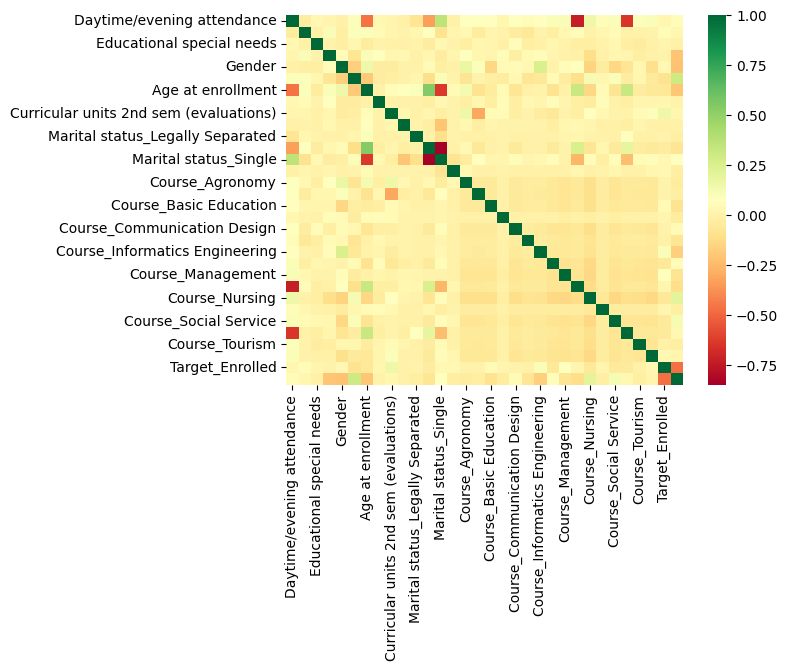

In [966]:
# TODO: this might be clutter, delete

sns.heatmap(dummy.corr().round(2),cmap='RdYlGn')

In [967]:
# TODO: Add heading

In [968]:
# TODO: change name of all_cols_2
all_cols_2=['Marital status', 'Application mode', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation"]

dummy = create_dummy(df_with_dummies, all_cols_2, dummy_na=False)
dummy

,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (evaluations),Target,Marital status_Facto union,Marital status_Legally Separated,...,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Mother's occupation_32
0,0,0,1,0,20,0,0,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,19,0,6,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,19,0,0,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,20,0,10,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,45,0,6,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,1,0,19,0,8,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
4420,0,1,0,0,18,1,6,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,0,0,0,1,30,0,9,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
4422,0,0,0,1,20,0,6,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0


In [969]:
# Normalizing data
y = np.array(dummy['Target'])
X_features = dummy.drop('Target', axis = 1)

scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X

array([[-0.10799294, -0.358167  ,  1.35764048, ..., -0.03363745,
        -0.03008284, -0.0499263 ],
       [-0.10799294, -0.358167  ,  1.35764048, ..., -0.03363745,
        -0.03008284, -0.0499263 ],
       [-0.10799294, -0.358167  ,  1.35764048, ..., -0.03363745,
        -0.03008284, -0.0499263 ],
       ...,
       [-0.10799294, -0.358167  , -0.73657203, ..., -0.03363745,
        -0.03008284, -0.0499263 ],
       [-0.10799294, -0.358167  , -0.73657203, ..., -0.03363745,
        -0.03008284, -0.0499263 ],
       [-0.10799294, -0.358167  , -0.73657203, ..., -0.03363745,
        -0.03008284, -0.0499263 ]])

In [970]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

### Logistic regression

In [971]:
# TODO: Add comments

log_model = LogisticRegression(random_state = 42, max_iter= 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [972]:
y_train_pred = log_model.predict(X_train)
y_train_pred

array(['Dropout', 'Graduate', 'Graduate', ..., 'Graduate', 'Graduate',
       'Enrolled'], dtype=object)

In [973]:
y_test_pred = log_model.predict(X_test)

In [974]:
# evaluate models accuracy
log_model_train_acc = round(accuracy_score(y_train, y_train_pred), 3)
print(f"training model accuracy: {log_model_train_acc}")

log_model_test_acc = round(accuracy_score(y_test, y_test_pred), 3)
print(f"training model accuracy: {log_model_test_acc}")

training model accuracy: 0.642
training model accuracy: 0.601


### Decision Trees

In [975]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [976]:
dt_y_test_pred = dt_model.predict(X_test)
dt_y_test_pred

array(['Dropout', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Dropout', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Enrolled', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Enrolled',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Dropout', 'Graduate', 'Enrolled', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Enrolled', 'Enrolled', 'Graduate',
       'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout',
  

In [977]:
dt_model_test_acc = round(accuracy_score(y_test, dt_y_test_pred), 3)
print(f"training model accuracy: {dt_model_test_acc}")

training model accuracy: 0.572


[Text(0.45306521529804755, 0.9848484848484849, 'X[6] <= -0.649\ngini = 0.613\nsamples = 3539\nvalue = [1105, 643, 1791]'),
 Text(0.09607145408522823, 0.9545454545454546, 'X[3] <= 0.582\ngini = 0.48\nsamples = 579\nvalue = [387, 41, 151]'),
 Text(0.06227132395105874, 0.9242424242424242, 'X[13] <= 2.099\ngini = 0.422\nsamples = 502\nvalue = [366, 33, 103]'),
 Text(0.03257601940041743, 0.8939393939393939, 'X[6] <= -1.409\ngini = 0.325\nsamples = 383\nvalue = [308, 12, 63]'),
 Text(0.031587463098081386, 0.8636363636363636, 'gini = 0.0\nsamples = 176\nvalue = [176, 0, 0]'),
 Text(0.03356457570275348, 0.8636363636363636, 'X[4] <= -0.233\ngini = 0.497\nsamples = 207\nvalue = [132, 12, 63]'),
 Text(0.016064039912960706, 0.8333333333333334, 'X[2] <= 0.311\ngini = 0.566\nsamples = 75\nvalue = [31, 6, 38]'),
 Text(0.00840272856985637, 0.803030303030303, 'X[1] <= 1.217\ngini = 0.505\nsamples = 40\nvalue = [10, 4, 26]'),
 Text(0.007414172267520326, 0.7727272727272727, 'X[6] <= -0.903\ngini = 0.438\

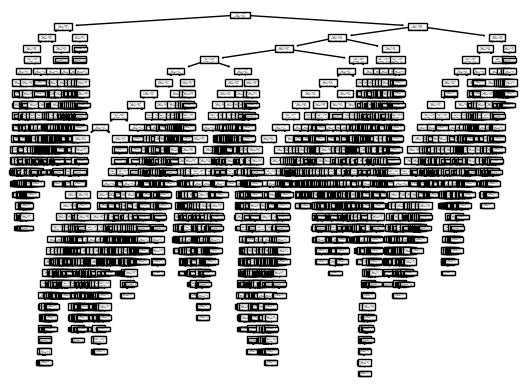

In [978]:
tree.plot_tree(dt_model)

In [979]:
# List for possible depth value
depth_values = list(range(1, 21))

# Create empty list for training data and validation data
training_acc = []

for d in tqdm(depth_values):
    tree_model = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    tree_model.fit(X_train, y_train)

    # Training accuracy
    y_pred_training = tree_model.predict(X_train)
    training_acc.append(accuracy_score(y_train, y_pred_training))

100%|████████████████████████████| 20/20 [00:00<00:00, 80.14it/s]


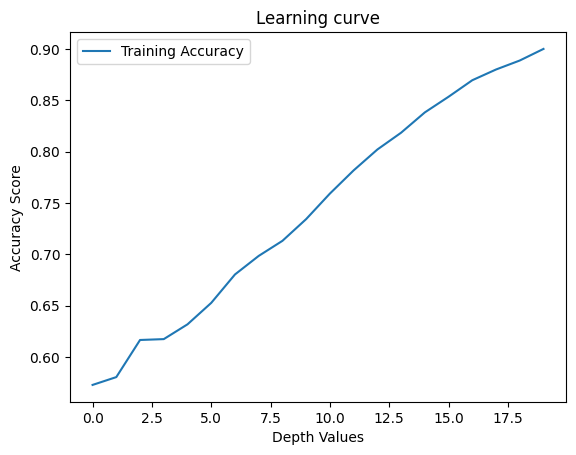

In [980]:
# Plotting learning curve
plt.plot(training_acc, label = 'Training Accuracy')
plt.xlabel('Depth Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

### Support Vector Machine

In [981]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [982]:
svm_y_test_pred = svm_model.predict(X_test)
svm_y_test_pred

array(['Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
      

In [983]:
svm_model_test_acc = round(accuracy_score(y_test, svm_y_test_pred), 3)
print(f"training model accuracy: {svm_model_test_acc}")

training model accuracy: 0.607


In [984]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
svm_linear = []

for k in tqdm(kernels):
    svm_model = svm.SVC(random_state = 42, kernel= k)
    svm_model.fit(X_train, y_train)
    if k == 'linear':
        svm_linear.append(svm_model)
    f_score = svm_model.score(X_test, y_test)
    score_list.update({k: f_score})


score_list

100%|██████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


{'linear': 0.5830508474576271,
 'poly': 0.5536723163841808,
 'rbf': 0.6067796610169491,
 'sigmoid': 0.5887005649717514}

### Neural Networks

In [985]:
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

In [986]:
nn_model.fit(X_train, y_train)

/Users/alex.smithglean.co/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [987]:
nn_y_test_pred = nn_model.predict(X_test)
nn_y_test_pred

array(['Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Enrolled', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
 

In [988]:
nn_model_test_acc = round(accuracy_score(y_test, nn_y_test_pred), 3)
print(f"training model accuracy: {nn_model_test_acc}")

training model accuracy: 0.636


### Random Forest

In [989]:
# rf_model = RandomForestClassifier(random_state=42)
rf_model = RandomForestClassifier()

In [990]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [991]:
rf_y_test_pred = rf_model.predict(X_test)
rf_y_test_pred

array(['Dropout', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Dropout', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Enrolled', 'Enrolled', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Graduate',
       'Dro

In [992]:
rf_model_test_acc = round(accuracy_score(y_test, rf_y_test_pred), 3)
print(f"training model accuracy: {rf_model_test_acc}")

training model accuracy: 0.618


### K Neighbours

In [993]:
k_model = KNeighborsClassifier()

In [994]:
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [995]:
k_y_test_pred = k_model.predict(X_test)
k_y_test_pred

array(['Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Dropout',

In [996]:
k_model_test_acc = round(accuracy_score(y_test, k_y_test_pred), 3)
print(f"training model accuracy: {k_model_test_acc}")

training model accuracy: 0.568


### optimised model

In [997]:
pipeline = Pipeline([
#     ('log', LogisticRegression(random_state = 42, max_iter= 1000)),
    ('clf', RandomForestClassifier())
])

In [998]:
pipeline.get_params()

{'memory': None,
 'steps': [('clf', RandomForestClassifier())],
 'verbose': False,
 'clf': RandomForestClassifier(),
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': None,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [999]:
parameters = {
#     'clf__min_samples_split': [2],
    'n_estimators': [50,100],
    'max_features': ['sqrt', None]

}

In [1000]:
cv = GridSearchCV(RandomForestClassifier(), param_grid=parameters, verbose=1, error_score='raise')

In [ ]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
cv_y_pred = cv.predict(X_test)

In [ ]:
cv_model_test_acc = round(accuracy_score(y_test, cv_y_pred), 3)
print(f"training model accuracy: {cv_model_test_acc}")

In [ ]:
pipeline = Pipeline([
    ('log', LogisticRegression(random_state = 42, max_iter= 1000)),
#     ('clf', RandomForestClassifier())
])

In [ ]:
pipeline.get_params()

In [ ]:
parameters = {
    'C':[1.0], 
    'fit_intercept':[True], 
    'max_iter':[1000], 
    'random_state':[42], 
    'solver':['lbfgs'],
    'tol':[0.0001]
}

In [ ]:
v = GridSearchCV(LogisticRegression(), param_grid=parameters, verbose=1, error_score='raise')

In [ ]:
v.fit(X_train, y_train)

In [ ]:
v_y_pred = cv.predict(X_test)

In [ ]:
v_model_test_acc = round(accuracy_score(y_test, v_y_pred), 3)
print(f"training model accuracy: {v_model_test_acc}")